In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("H:/TOPMENTOR/2024/April-month/April 7 Assignments/Assignment/Project - 1&2_ Simple_Reg/delivery_time.csv")

In [3]:
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
# Preprocessing of data

In [5]:
print("The number of rows and columns - ", data.shape)
print("The data types - ", data.dtypes)
print("The Number of Missing Records - ",data.isnull().sum())

The number of rows and columns -  (21, 2)
The data types -  Delivery Time    float64
Sorting Time       int64
dtype: object
The Number of Missing Records -  Delivery Time    0
Sorting Time     0
dtype: int64


In [7]:
##Exploratory Data Analysis 

In [8]:
print(data.columns)

Index(['Delivery Time', 'Sorting Time'], dtype='object')


In [9]:
print(data.describe())

       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


C:\Users\vemul\AppData\Local\Temp\ipykernel_12816\2858716435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['Sorting Time'])


0.047115474210530174


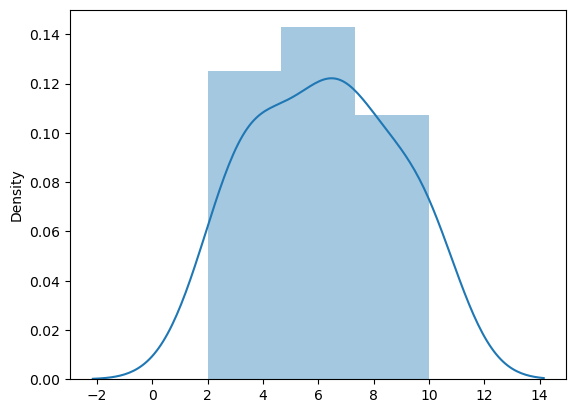

In [39]:
sns.distplot(x = data['Sorting Time'])
plt.savefig("Sortingtime-distplot.jpg", dpi=300)
print(data['Sorting Time'].skew())

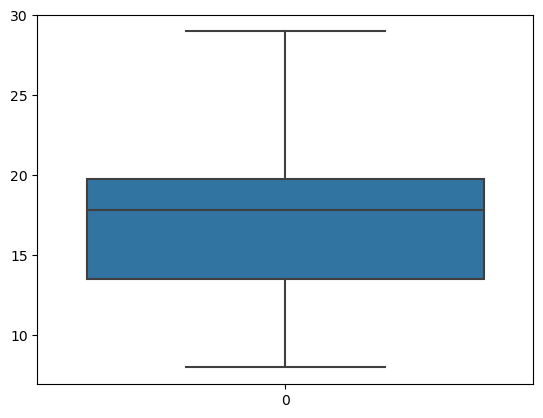

In [38]:
sns.boxplot(data['Delivery Time'])
plt.savefig("Deliverytime-boxplot.jpg", dpi=300)

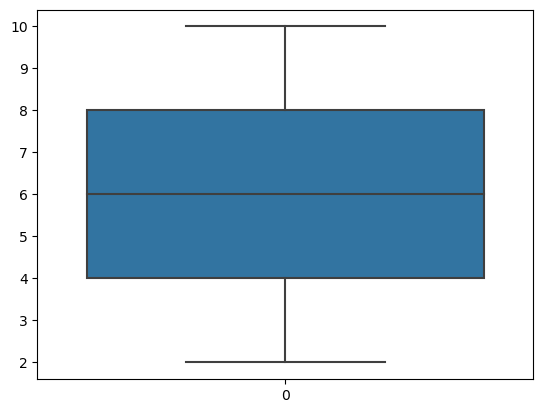

In [40]:
sns.boxplot(data['Sorting Time'])
plt.savefig("Sortingtime-boxplot.jpg", dpi=300)

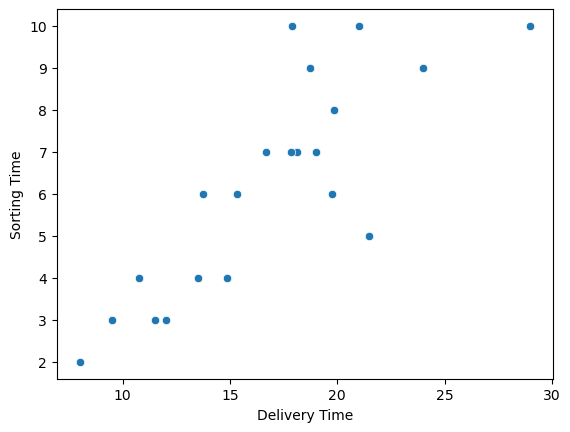

In [37]:
sns.scatterplot(x=data['Delivery Time'],y=data['Sorting Time'])
plt.savefig("Deliverytime-sortingtime_scatterplot.jpg", dpi=300)

### Splitting the Data into Training and Testing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data['Sorting Time'].values.reshape(-1,1)
X

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [18]:
y = data['Delivery Time'].values.reshape(-1,1)
y

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [19]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
X_train.shape, X_test.shape

((16, 1), (5, 1))

In [21]:
y_train.shape, y_test.shape

((16, 1), (5, 1))

### Modelling Part

In [23]:
model = LinearRegression()
#### Train the Model with Training Data ----
model_train = model.fit(X_train, y_train)
print("Model Training is Completed")

Model Training is Completed


In [26]:
print("Model coefficient =",model.coef_)
print("Model intercept =",model.intercept_)

Model coefficient = [[1.4901682]]
Model intercept = [7.4996789]


In [27]:
##### Validate the Model
pred = model.predict(X_test)
pred

array([[17.93085627],
       [20.91119266],
       [13.46035168],
       [22.40136086],
       [22.40136086]])

In [28]:
#### compare with the Actual and Check the accuracy - 
y_test

array([[19.  ],
       [18.75],
       [10.75],
       [29.  ],
       [21.  ]])

In [29]:
pred

array([[17.93085627],
       [20.91119266],
       [13.46035168],
       [22.40136086],
       [22.40136086]])

In [32]:
#rsquare values  - to check the strength of the Model - 0 to 1
### if it is closer to 1 , that means the Model is Strong , closer to 0 weak model
##### mean squared error / root mean squared error 

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [41]:
round(r2_score(y_test,pred),2)

0.65

In [42]:
round(mean_squared_error(y_test,pred),2)  #### as less as possible

11.73

In [43]:
round(sqrt(mean_squared_error(y_test,pred)),2)  ### rmse - should be within 0

3.43